In [2]:
import pandas as pd
import numpy as np

In [3]:
rawtrain = pd.read_csv("D:\\PythonSamples\\NYTaxi\\train\\train.csv")

In [4]:
len(rawtrain.columns)

11

In [5]:
len(rawtrain)

1458644

In [6]:
rawtrain.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
rawtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
from math import sin, cos, sqrt, atan2, radians

In [9]:
def find_distance(row):# approximate radius of earth in km
    R = 6373.0
    lat1 = radians(abs(row['pickup_latitude']))
    lon1 = radians(abs(row['pickup_longitude']))
    lat2 = radians(abs(row['dropoff_latitude']))
    lon2 = radians(abs(row['dropoff_longitude']))
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return round(distance)

def store_flag(row):
    flags = row['store_and_fwd_flag']
    if flags == 'N':
        return 0
    else:
        return 1
import time
import datetime

def converttime(row):
    Pickup_time = row['pickup_datetime']
    #  '2016-01-01 17:44:40'
    formated_time = time.mktime(datetime.datetime.strptime(Pickup_time, "%Y-%m-%d %H:%M:%S").timetuple())
    return formated_time

def find_weekday(row):
    pickuptime = row['pickup_datetime']
    weekdays = datetime.datetime.strptime(pickuptime, "%Y-%m-%d %H:%M:%S").weekday()
    if weekdays >= 5:
        return 0
    else:
        return 1

def find_peakhour(row):
    pickuptime = row['pickup_datetime']
    hourofday = datetime.datetime.strptime(pickuptime, "%Y-%m-%d %H:%M:%S").hour
    peakhours = [7,8,9,16,17,18,19]
    if hourofday in peakhours:
        return 1
    else:
        return 0


In [10]:
rawtrain['distance'] = rawtrain.apply(find_distance,axis = 1)

In [11]:
rawtrain['weekday_end'] = rawtrain.apply(find_weekday,axis = 1)

In [12]:
rawtrain['peak_hour'] = rawtrain.apply(find_peakhour,axis = 1)

In [13]:
rawtrain['pickup_time'] = rawtrain.apply(converttime,axis = 1)

In [14]:
rawtrain['store_fwd_flag'] = rawtrain.apply(store_flag,axis = 1)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

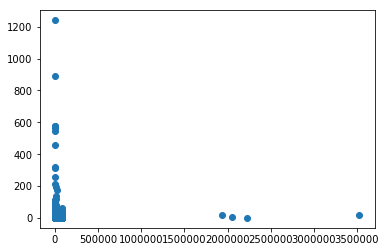

In [16]:
plt.scatter(rawtrain['trip_duration'],rawtrain['distance'])

In [17]:
tesing = rawtrain.loc[rawtrain['trip_duration'] <= 10000]
len(tesing)

1456521

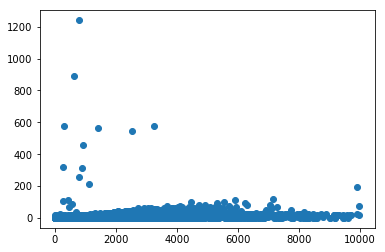

In [18]:
plt.scatter(tesing['trip_duration'],tesing['distance'])

In [19]:
tesing = tesing.loc[tesing['distance'] <= 200]
len(tesing)


1456510

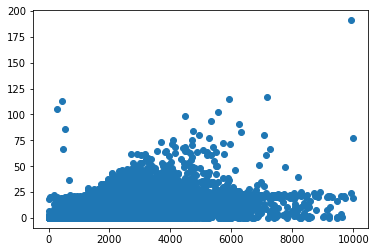

In [20]:
plt.scatter(tesing['trip_duration'],tesing['distance'])

In [27]:
tesing = tesing.loc[tesing['distance'] <= 60]
len(tesing)

1456462

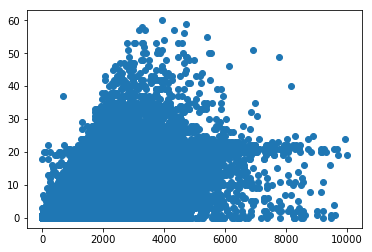

In [28]:
plt.scatter(tesing['trip_duration'],tesing['distance'])

In [188]:
avg_sec_9000 = tesing.loc[(tesing['trip_duration'] > 9000) & (tesing['trip_duration'] <= 10000)]
#avg_sec_8000 = tesing.loc[(tesing['trip_duration'] > 8000) & (tesing['trip_duration'] <= 9000)]
#avg_sec_7000 = tesing.loc[(tesing['trip_duration'] > 7000) & (tesing['trip_duration'] <= 8000)]
#avg_sec_6000 = tesing.loc[(tesing['trip_duration'] > 6000) & (tesing['trip_duration'] <= 7000)]
#avg_sec_5000 = tesing.loc[(tesing['trip_duration'] > 5000) & (tesing['trip_duration'] <= 6000)]
#avg_sec_4000 = tesing.loc[(tesing['trip_duration'] > 4000) & (tesing['trip_duration'] <= 5000)]
#avg_sec_3000 = tesing.loc[(tesing['trip_duration'] > 3000) & (tesing['trip_duration'] <= 4000)]
#avg_sec_2000 = tesing.loc[(tesing['trip_duration'] > 2000) & (tesing['trip_duration'] <= 3000)]
#avg_sec_1000 = tesing.loc[(tesing['trip_duration'] > 1000) & (tesing['trip_duration'] <= 2000)]
#avg_sec_0000 = tesing.loc[tesing['trip_duration'] <= 1000]

In [189]:
avg_sec_9000['duration_type'] = '9to10'
avg_sec_8000['duration_type'] = '8to9'
avg_sec_7000['duration_type'] = '7to8'
avg_sec_6000['duration_type'] = '6to7'
avg_sec_5000['duration_type'] = '5to6'
avg_sec_4000['duration_type'] = '4to5'
avg_sec_3000['duration_type'] = '3to4'
avg_sec_2000['duration_type'] = '2to3'
avg_sec_1000['duration_type'] = '1to2'
avg_sec_0000['duration_type'] = '0to1'

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [190]:
def mark_dur_type(row):
    var1 = row['duration_type']
    if var1 == '9to10':
        return 0.9
    if var1 == '8to9':
        return 0.8
    if var1 == '7to8':
        return 0.7
    if var1 == '6to7':
        return 0.6
    if var1 == '5to6':
        return 0.5
    if var1 == '4to5':
        return 0.4
    if var1 == '3to4':
        return 0.3
    if var1 == '2to3':
        return 0.2
    if var1 == '1to2':
        return 0.1
    if var1 == '0to1':
        return 0.01

In [191]:
avg_sec_9000['dura_type'] =  avg_sec_9000.apply(mark_dur_type, axis = 1)

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [346]:
def find_hour(row):
    pickuptime = row['pickup_datetime']
    hourofday = datetime.datetime.strptime(pickuptime, "%Y-%m-%d %H:%M:%S").hour
    return hourofday
   

In [347]:
avg_sec_9000['pickup_hour'] =  avg_sec_9000.apply(find_hour, axis = 1)

C:\Users\hdadmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
avg_sec_9000.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,weekday_end,peak_hour,pickup_time,store_fwd_flag,dura_type
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0000,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01
mean,1.428571,1.571429,-73.857745,40.692193,-73.940367,40.721232,9393.761905,12.0000,0.571429,0.380952,1.460827e+09,0.047619,9.000000e-01
std,0.507093,1.121224,0.093745,0.056151,0.089108,0.043336,282.232157,9.2358,0.507093,0.497613,3.597997e+06,0.218218,1.137640e-16
min,1.000000,1.000000,-73.996986,40.643745,-74.029587,40.644341,9009.000000,0.0000,0.000000,0.000000,1.454736e+09,0.000000,9.000000e-01
25%,1.000000,1.000000,-73.973656,40.645233,-73.991829,40.702629,9172.000000,2.0000,0.000000,0.000000,1.457440e+09,0.000000,9.000000e-01
50%,1.000000,1.000000,-73.790184,40.646954,-73.985306,40.743465,9310.000000,16.0000,1.000000,0.000000,1.462469e+09,0.000000,9.000000e-01
75%,2.000000,2.000000,-73.782188,40.755276,-73.955772,40.756191,9581.000000,20.0000,1.000000,1.000000,1.463318e+09,0.000000,9.000000e-01
max,2.000000,5.000000,-73.776787,40.769566,-73.781960,40.763916,9984.000000,24.0000,1.000000,1.000000,1.466616e+09,1.000000,9.000000e-01


In [196]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 10))
rescale = scaler.fit(avg_sec_9000['distance'])
avg_sec_9000['scaled_dist'] = scaler.transform(avg_sec_9000['distance'])


C:\Users\hdadmin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\hdadmin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\hdadmin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\hdadmin\Anaconda3\lib\site-pa

In [195]:
rescale

array([  7.   ,   8.125,   8.875,   2.5  ,   8.5  ,   1.   ,   8.875,
        10.   ,   1.375,   5.125,   1.375,   1.375,   1.   ,   8.875,
         1.75 ,   8.5  ,   4.   ,   1.75 ,   8.125,   8.5  ,   8.875])

In [348]:
avg_sec_9000.sort_values(['distance'], ascending=[False])
#sort_values(['dura_type'], ascending=[True])


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,weekday_end,peak_hour,pickup_time,store_fwd_flag,duration_type,dura_type,scaled_dist,pickup_hour
259713,id1357675,1,2016-04-15 17:49:41,2016-04-15 20:35:03,4,-73.782234,40.644501,-74.029587,40.747803,N,9922,24,1,1,1.460728e+09,0,9to10,0.9,10.000,17
1270767,id3002319,2,2016-03-13 11:47:15,2016-03-13 14:26:55,1,-73.781769,40.644730,-73.981133,40.756191,N,9580,21,0,0,1.457855e+09,0,9to10,0.9,8.875,11
114196,id1948130,1,2016-05-15 15:31:55,2016-05-15 18:05:52,1,-73.780426,40.645290,-74.014984,40.709248,N,9237,21,0,0,1.463312e+09,0,9to10,0.9,8.875,15
230581,id1628821,1,2016-05-15 17:16:32,2016-05-15 19:57:48,1,-73.783203,40.648609,-73.992882,40.756882,N,9676,21,0,1,1.463318e+09,0,9to10,0.9,8.875,17
821202,id3602082,1,2016-02-06 09:11:42,2016-02-06 11:44:17,1,-73.790184,40.646881,-73.989380,40.760166,N,9155,21,0,1,1.454736e+09,0,9to10,0.9,8.875,9
1161741,id1918195,1,2016-05-15 17:34:33,2016-05-15 20:09:43,2,-73.777390,40.646591,-73.985306,40.730000,N,9310,20,0,1,1.463319e+09,0,9to10,0.9,8.500,17
133723,id0930106,2,2016-02-29 12:54:31,2016-02-29 15:27:23,1,-73.791573,40.645233,-73.991829,40.746456,N,9172,20,1,0,1.456736e+09,0,9to10,0.9,8.500,12
1049365,id1718005,2,2016-04-07 14:42:52,2016-04-07 17:15:11,5,-73.976898,40.764439,-73.790459,40.654259,N,9139,20,1,0,1.460026e+09,0,9to10,0.9,8.500,14
96988,id0951735,1,2016-05-15 15:04:23,2016-05-15 17:46:17,1,-73.789658,40.646954,-73.993774,40.720768,N,9714,19,0,0,1.463310e+09,0,9to10,0.9,8.125,15
1135020,id2775008,1,2016-05-09 13:41:30,2016-05-09 16:27:54,1,-73.973389,40.758347,-73.794540,40.656563,Y,9984,19,1,0,1.462787e+09,1,9to10,0.9,8.125,13


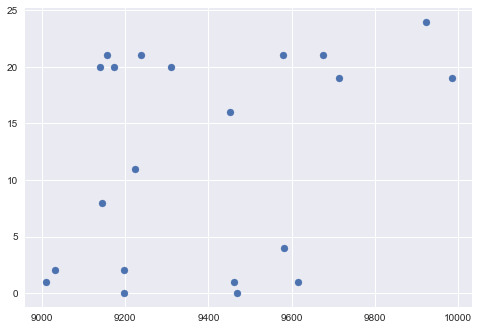

In [50]:
#bins=[1,2,3,4,5,6,7,8,9,10]
#survived_hist=train['trip_duration']
#plt.scatter(rawtrain['trip_duration'],rawtrain['trip_duration'])
#plt.scatter(tesing['trip_duration'],tesing['distance'])
plt.scatter(avg_sec_9000['trip_duration'],avg_sec_9000['distance'])

(array([ 7.,  1.,  0.,  1.,  1.,  0.,  1.,  2.,  7.,  1.]),
 array([  0. ,   2.4,   4.8,   7.2,   9.6,  12. ,  14.4,  16.8,  19.2,
         21.6,  24. ]),
 <a list of 10 Patch objects>)

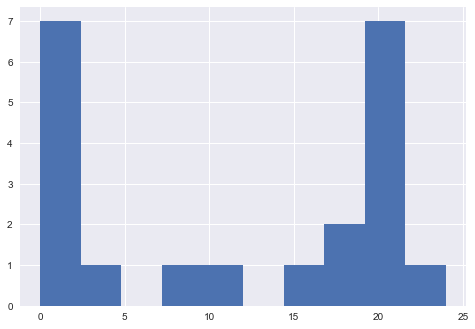

In [154]:
#plt.hist(avg_sec_9000['distance'])

plt.hist(avg_sec_9000['distance'],10)

In [155]:
avg9000_high = np.percentile(avg_sec_9000['distance'],100)
avg9000_low = np.percentile(avg_sec_9000['distance'],25)
avg_sec_9000 = avg_sec_9000.loc[(avg_sec_9000['distance'] > avg9000_low) & (avg_sec_9000['distance'] <= avg9000_high)]
#avg9000_high
#avg9000_low

In [571]:
#,'scaled_dist''dura_type','dropoff_longitude','dropoff_latitude','pickup_time',,'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'
avg_9000_traindata = avg_sec_9000[['vendor_id','passenger_count','pickup_latitude','dropoff_latitude','dropoff_longitude','store_fwd_flag','distance','weekday_end','pickup_hour','trip_duration']]


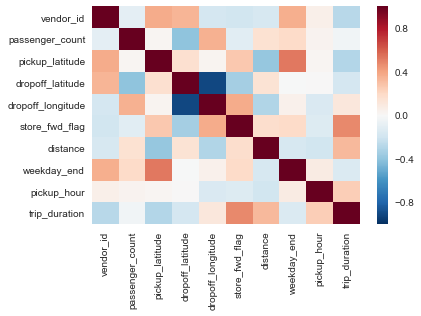

In [572]:
sb.heatmap(avg_9000_traindata.corr())

In [573]:
avg_9000_traindata.apply(lambda s: avg_9000_traindata.corrwith(s))

,vendor_id,passenger_count,pickup_latitude,dropoff_latitude,dropoff_longitude,store_fwd_flag,distance,weekday_end,pickup_hour,trip_duration
vendor_id,1.000000,-0.100504,0.369442,0.342945,-0.176359,-0.193649,-0.170816,0.361111,0.060765,-0.280139
passenger_count,-0.100504,1.000000,0.017246,-0.404892,0.358643,-0.116775,0.149680,0.188445,0.036643,-0.032572
pickup_latitude,0.369442,0.017246,1.000000,0.160860,0.027565,0.269944,-0.386778,0.528998,0.022878,-0.295893
dropoff_latitude,0.342945,-0.404892,0.160860,1.000000,-0.908038,-0.341921,0.144505,-0.000682,0.003074,-0.175620
dropoff_longitude,-0.176359,0.358643,0.027565,-0.908038,1.000000,0.374973,-0.297134,0.052546,-0.149165,0.115194
store_fwd_flag,-0.193649,-0.116775,0.269944,-0.341921,0.374973,1.000000,0.173661,0.193649,-0.138067,0.479182
distance,-0.170816,0.149680,-0.386778,0.144505,-0.297134,0.173661,1.000000,-0.170816,-0.191504,0.323789
weekday_end,0.361111,0.188445,0.528998,-0.000682,0.052546,0.193649,-0.170816,1.000000,0.081020,-0.142939
pickup_hour,0.060765,0.036643,0.022878,0.003074,-0.149165,-0.138067,-0.191504,0.081020,1.000000,0.243156
trip_duration,-0.280139,-0.032572,-0.295893,-0.175620,0.115194,0.479182,0.323789,-0.142939,0.243156,1.000000


In [574]:
len(avg_9000_traindata.columns)

10

In [575]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
import sklearn 
from sklearn.linear_model import LinearRegression 
%matplotlib inline 
#dividing the dataset to tarining set and test set 
from sklearn.cross_validation import train_test_split 
import seaborn as sb


In [576]:
X9000=avg_9000_traindata.iloc[:,0:9]
Y9000=avg_9000_traindata.iloc[:,9]

In [524]:
from sklearn.decomposition import PCA
#Initialize PCA for calculating 9variables 
pca = PCA(n_components=6) 

#calculate PCA with independent 9 columns 
pca.fit(X9000)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [540]:
var= pca.explained_variance_ratio_ 
var

array([  9.82399793e-01,   1.41798129e-02,   2.87990731e-03,
         5.08708999e-04,   2.55540881e-05,   6.22374273e-06])

In [541]:
#Cumulative Variance explains 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100) 
print(var1)

[  98.24   99.66   99.95  100.    100.    100.  ]


In [577]:
x_train9, x_test9, y_train9, y_test9 = sklearn.cross_validation.train_test_split(X9000, Y9000, test_size = 0.20, random_state =2 ) 

In [578]:
#creating the Linear regression model 
lm9 = LinearRegression()
 
#fit the model on train dataset 
lm9.fit(x_train9, y_train9) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [579]:
#make predictions using created model 
y_train_pred9 = lm9.predict(x_train9)  
 
#use the model to predice the test dataset 
y_test_pred9 = lm9.predict(x_test9) 

In [580]:
#put the predicted and actual side by side to check the efficiency of the model 
df9 = pd.DataFrame(y_test_pred9.round(),y_test9) 

In [581]:
df9.head(20)

,0
trip_duration,
9462,9414.0
9676,9602.0
9451,9522.0
9031,9153.0
9581,9441.0


In [582]:
def rmse(y1,y_hat):
    y_actual = np.array(y1)
    y_pred=np.array(y_hat)
    error=(y_actual-y_pred)**2
    error_mean=round(np.mean(error))
    err_sq=sqrt(error_mean)
    return err_sq

In [583]:
rmse(y_test9, y_test_pred9)

97.28309205612247

In [ ]:
def rmsle(predicted,real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [587]:
#calculate the MSE 
from sklearn import metrics  
#from sklearn.metrics import score
 
mse = metrics.mean_squared_error(y_test9, y_test_pred9) 
#print(mse)
sqrt(mse)

97.28332509696116

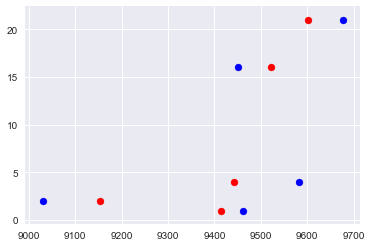

In [585]:
plt.scatter(y_test_pred9, x_test9['distance'],c='red', marker='o', label = 'Test data')
plt.scatter(y_test9, x_test9['distance'],c='blue', marker='o', label = 'Test data')